In [ ]:
%pip install multion
%pip install agentops

# Retrieve

In [ ]:
import multion
from multion.client import MultiOn
import os

multion = MultiOn(
    api_key=os.environ.get("MULTION_API_KEY"),
    agentops_api_key=os.environ.get("AGENTOPS_API_KEY"),
)
create_session_params = {"url": "https://www.rei.com/"}

create_session_response = multion.sessions.create(**create_session_params)
session_id = create_session_response.session_id
cmd = "find the cheapest satellite phone on REI"
print(create_session_response.message)

retrieve_response = multion.sessions.retrieve(session_id=session_id, cmd=cmd, url="https://www.rei.com/", fields=["price"], page_number=2, include_screenshot=True)
print(retrieve_response.message)

while retrieve_response.status == "CONTINUE":
    retrieve_response = multion.sessions.retrieve(
        session_id=session_id,
        cmd=cmd,
        url="https://www.rei.com/",
        fields=["price"],
        page_number=2,
        include_screenshot=True,
    )
    print(retrieve_response.message)

if retrieve_response.status == "DONE":
    print("task completed")

get_screenshot = multion.sessions.screenshot(session_id=session_id)
close_session_response = multion.sessions.close(session_id=session_id)

## Check your session
Check your session on [AgentOps](https://app.agentops.ai)

![2024-06-05 01.16.12.gif](<attachment:2024-06-05 01.16.12.gif>)
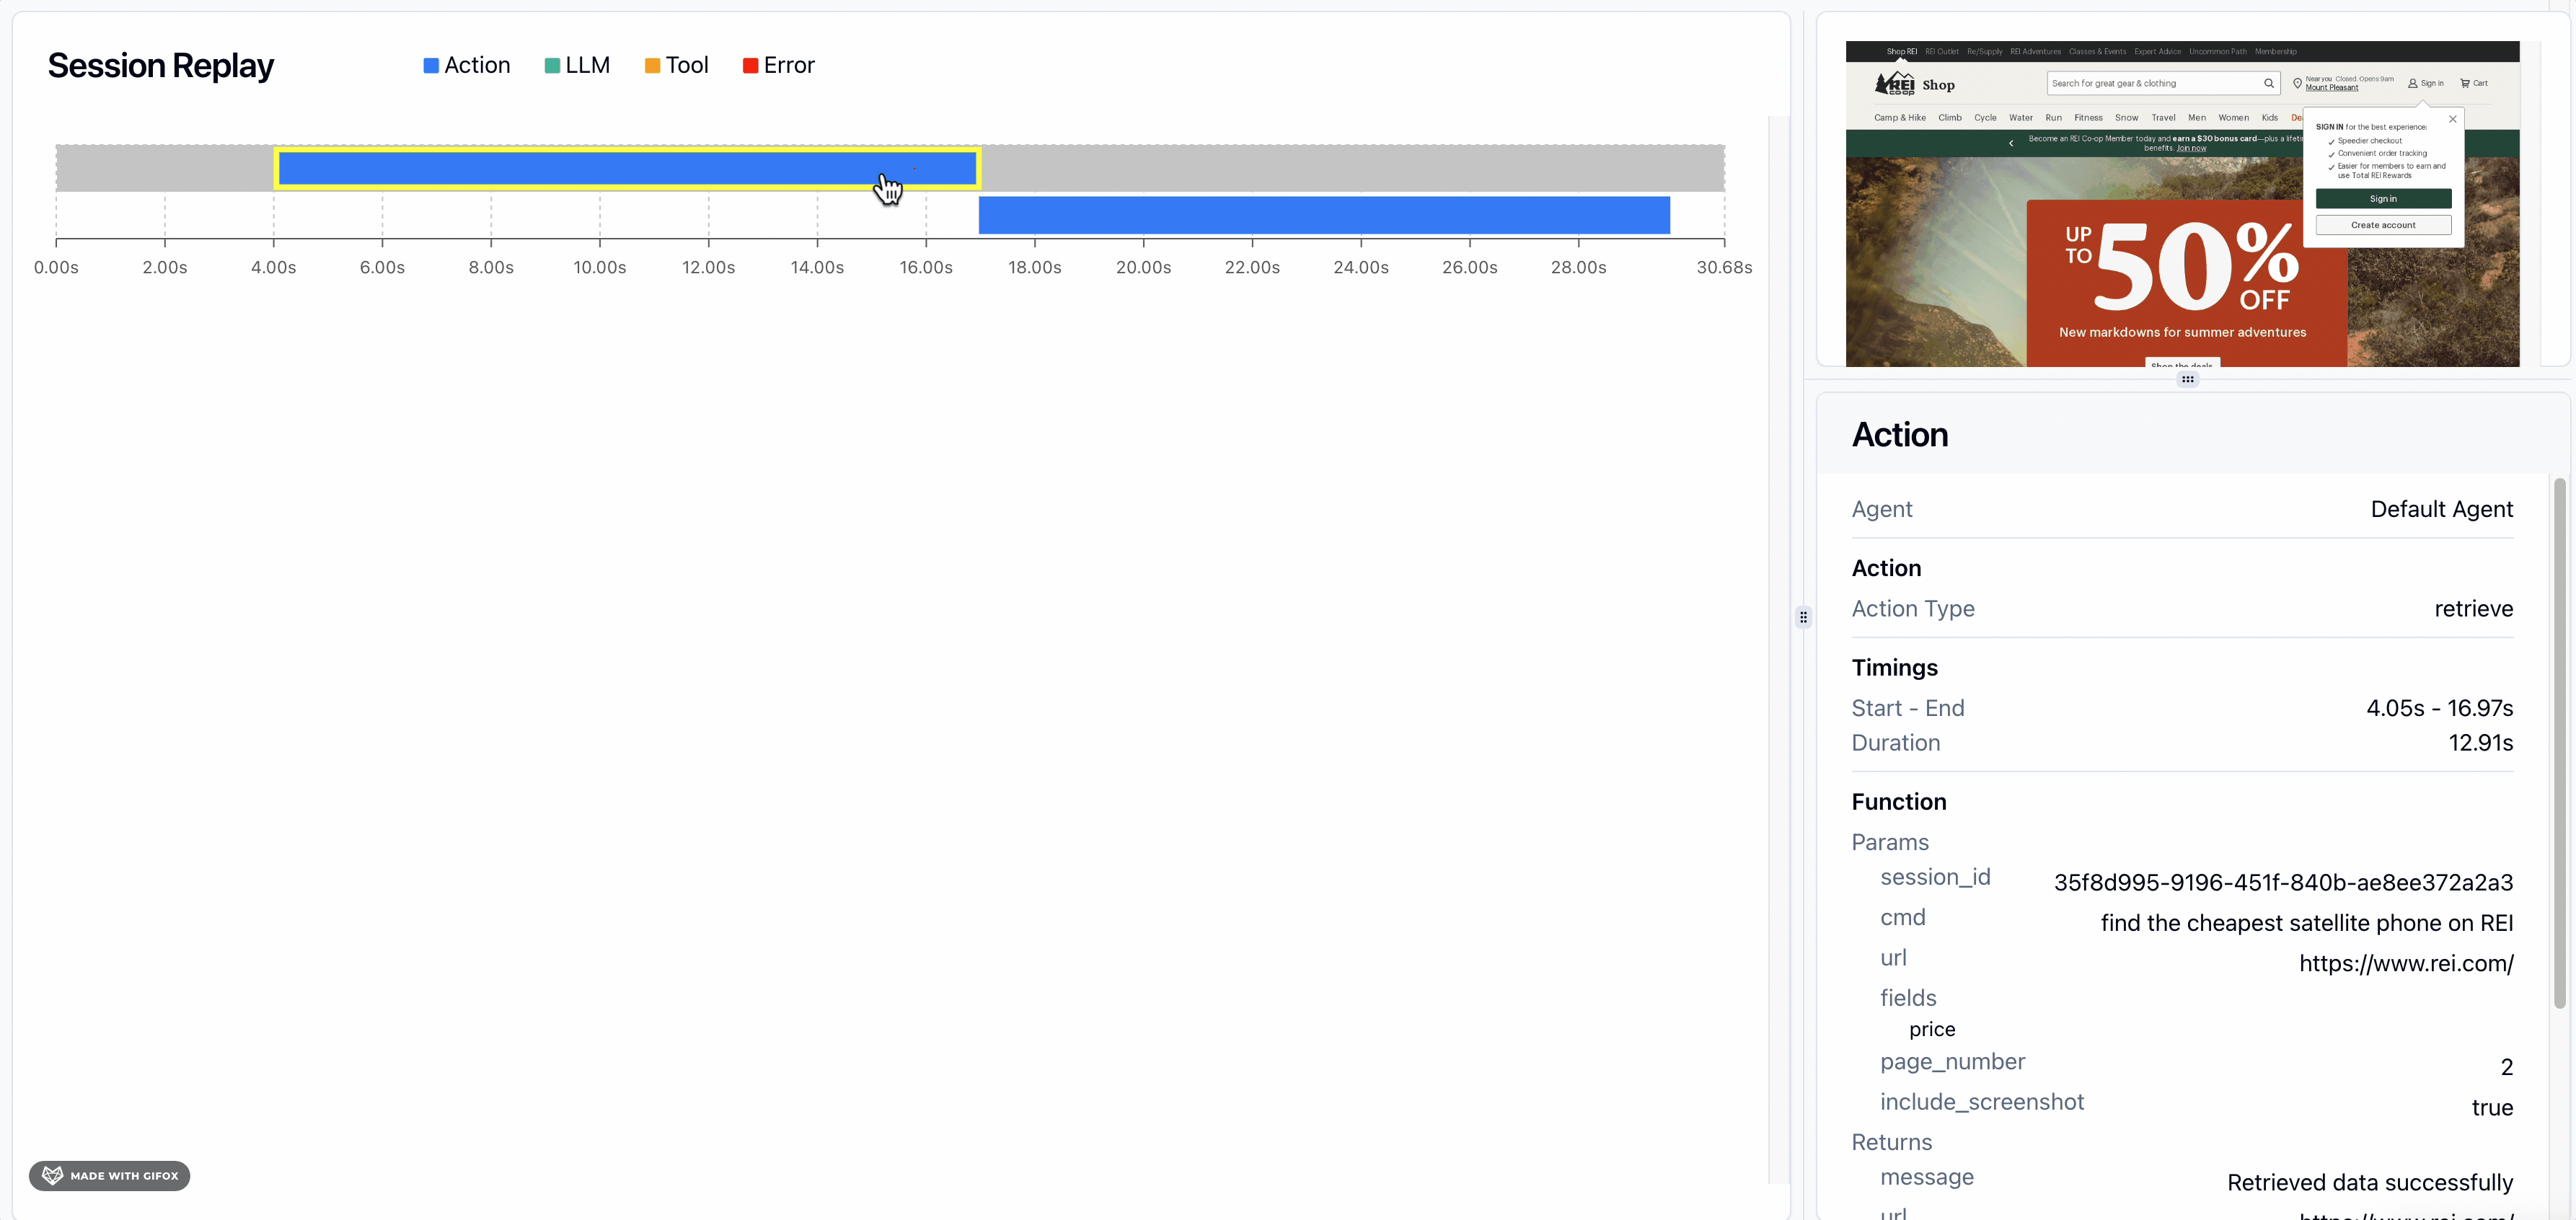